In [7]:
import numpy as np
x = np.linspace(-5, 5, 20) #GMM에 대한 기본구현 1차원 데이터 생성

x1 = x*np.random.rand(20)
x2 = x*np.random.rand(20) + 10
x3 = x*np.random.rand(20) - 10

xt = np.hstack((x1,x2,x3))

In [8]:
max_iterations = 10  #GMM에 대한 매개 변수 초기화 : μ, π, Σ.
pi = np.array([1/3, 1/3, 1/3])
mu = np.array([5,6,-3])
var = np.array([1,3,9])
r = np.zeros((len(xt), 3))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

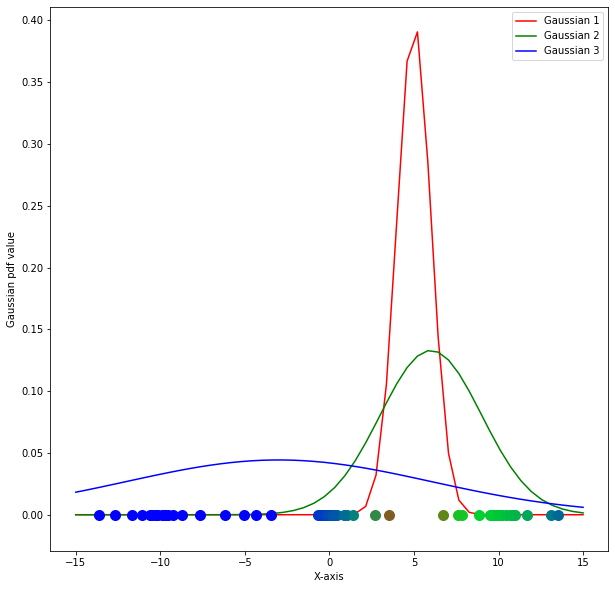

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

gauss1 = norm(loc=mu[0], scale=var[0])
gauss2 = norm(loc=mu[1], scale=var[1])
gauss3 = norm(loc=mu[2], scale=var[2])

    # E-Step
for c,g,p in zip(range(3), [gauss1, gauss2, gauss3], pi):
    r[:,c] = p*g.pdf(xt[:])

for i in range(len(r)):
    r[i,:] /= np.sum(r[i,:])

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

for i in range(len(r)):
    ax0.scatter(xt[i],0,c=r[i,:],s=100) 

for g,c in zip([gauss1.pdf(np.linspace(-15,15)),gauss2.pdf(np.linspace(-15,15)),gauss3.pdf(np.linspace(-15,15))],['r','g','b']):
    ax0.plot(np.linspace(-15,15),g,c=c,zorder=0)

ax0.set_xlabel('X-axis')
ax0.set_ylabel('Gaussian pdf value')
ax0.legend(['Gaussian 1', 'Gaussian 2', 'Gaussian 3'])

plt.show()

    # M-Step
mc = np.sum(r, axis=0)
pi = mc/len(xt)
mu = np.sum(r*np.vstack((xt, xt, xt)).T, axis=0)/mc
var = []

for c in range(len(pi)):
    var.append(np.sum(np.dot(r[:,c]*(xt[i] - mu[c]).T, r[:,c]*(xt[i] - mu[c])))/mc[c])